In [6]:
import pandas as pd
import seaborn as sns
import os
from datetime import datetime
import numpy as np
import pandas as pd
from collections import Counter
import matplotlib
import matplotlib.font_manager as font_manager
from matplotlib import cm
font_dirs = ['./font']
font_files = font_manager.findSystemFonts(fontpaths=font_dirs)
font_list = font_manager.createFontList(font_files)
font_manager.fontManager.ttflist.extend(font_list)
matplotlib.rcParams['font.family'] = 'Malgun Gothic'

from matplotlib import pyplot as plt
import matplotlib.font_manager as fm
font_path = "./malgun.ttf"
font_name = fm.FontProperties(fname=font_path,size=18).get_name()

C:\Users\pcn\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: MatplotlibDeprecationWarning: 
The createFontList function was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use FontManager.addfont instead.
  del sys.path[0]


In [7]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
%matplotlib inline
wordcloud = WordCloud(
    font_path = '../malgun.ttf',    # 맥에선 한글폰트 설정 잘해야함.
    background_color='black',                             # 배경 색깔 정하기
    colormap = 'Accent_r',                                # 폰트 색깔 정하기
    width = 800,
    height = 800
)

In [8]:
path = "TB_COL_EX_T_CUSD_HIWAY_CNSTN_PRSS01L1_20201021000000/"
file_name = "수정.csv"

In [10]:
df = pd.read_csv(path+file_name, error_bad_lines=False)

b'Skipping line 126: expected 12 fields, saw 13\nSkipping line 127: expected 12 fields, saw 13\nSkipping line 128: expected 12 fields, saw 13\nSkipping line 129: expected 12 fields, saw 13\nSkipping line 130: expected 12 fields, saw 13\nSkipping line 131: expected 12 fields, saw 13\nSkipping line 132: expected 12 fields, saw 13\nSkipping line 133: expected 12 fields, saw 13\nSkipping line 134: expected 12 fields, saw 13\nSkipping line 135: expected 12 fields, saw 13\nSkipping line 136: expected 12 fields, saw 13\nSkipping line 137: expected 12 fields, saw 13\nSkipping line 138: expected 12 fields, saw 13\nSkipping line 139: expected 12 fields, saw 13\nSkipping line 295: expected 12 fields, saw 13\nSkipping line 296: expected 12 fields, saw 13\nSkipping line 297: expected 12 fields, saw 13\n'


In [11]:
new_df = df.iloc[:,1:]

In [12]:
new_df = new_df.rename(columns={'TRFC_ROTNM':'교통노선명',
                'HIWAY_SCTNM':'고속도로구간명',
                'BIZ_MGMT_NM':'사업관리명',
                'EXTNS_DSTNE':'연장거리',
                'CNSTN_TERM_STRT_DATES':'공사기간시작일자',
                'CNSTN_TERM_END_DATES':'공사기간종료일자',
                'CNSTN_SECT_STPNT_NM':'공사구간시점명',
                'CNSTN_SECT_EDPNT_NM':'공사구간종점명',
                'BIZ_PRGS_STAT_CD':'사업진행상태코드',
                'KOR_DPTNM':'한글부서명',
                'LSTTM_CHNG_DTTM':'최종변경일시'})

In [13]:
new_df.head()

,교통노선명,고속도로구간명,사업관리명,연장거리,공사기간시작일자,공사기간종료일자,공사구간시점명,공사구간종점명,사업진행상태코드,한글부서명,최종변경일시
0,경부선,언양-부산,3공구,10.00,20011207,20051205,경상남도 양산시 동면 내송리,부산광역시 금정구 구서동,C03,영동김천건설사업소,20201211083041
1,경부선,언양-부산,2공구,14.00,20011207,20051213,경상남도 양산시 상북면 상삼리,경상남도 양산시 신기동,C03,영동김천건설사업소,20201211083041
2,경부선,언양-부산,1공구,12.00,20011207,20051213,울산광역시 울주군 언양읍 동부리,경상남도 양산시 하북면,C03,영동김천건설사업소,20201211083041
3,경부선,동대구-경주,3공구,6.52,20011106,20061108,경상북도 영천시 금호읍 호남리,경상북도 영천시 본촌동,C03,영동김천건설사업소,20201211083041
4,경부선,동대구-경주,2공구,9.00,20011106,20061108,경상북도 경산시 진량읍 선화리,경상북도 영천시 금호읍 오계리,C03,영동김천건설사업소,20201211083041


In [14]:
new_df['사업진행상태코드'].unique()

array(['C03', 'C02'], dtype=object)

In [15]:
new_df3 = new_df[new_df['사업진행상태코드']=='C03']
new_df2 = new_df[new_df['사업진행상태코드']=='C02']
print(len(new_df2),len(new_df3),len(new_df))

113 314 427


In [16]:
buse_df_3 = pd.DataFrame(zip(new_df3.groupby('한글부서명').size().index,new_df3.groupby('한글부서명').size().values)  ,columns=['한글부서명','한글부서_count'])      
distance_df_3 =  pd.DataFrame(zip(new_df3.groupby('한글부서명').sum()['연장거리'].index,new_df3.groupby('한글부서명').sum()['연장거리'].values) ,columns=['한글부서명','연장거리'])

In [17]:
bd_df_3 = pd.merge(buse_df_3,distance_df_3)

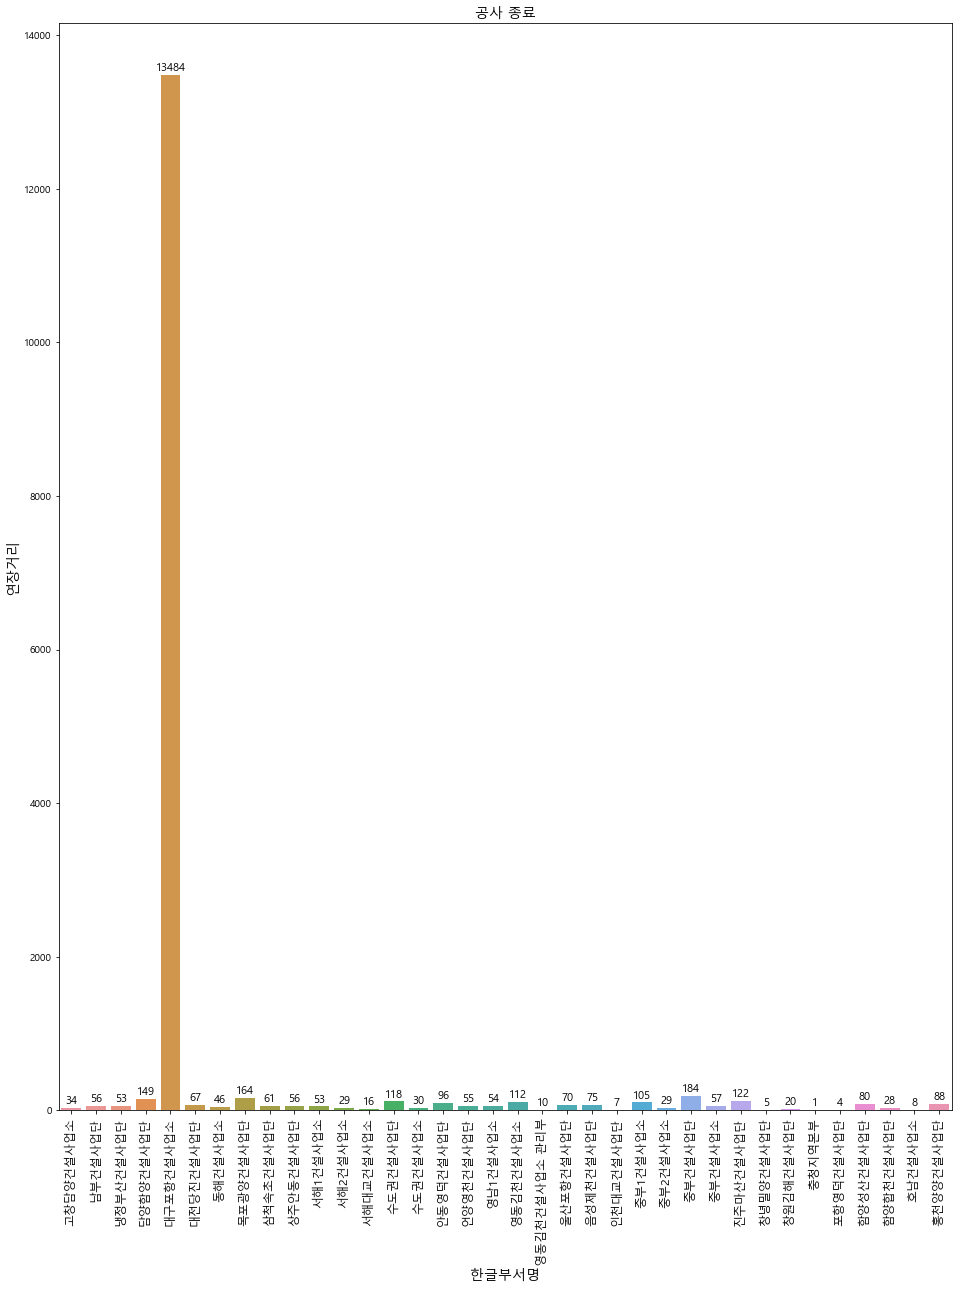

In [19]:
fig = plt.figure(figsize=(16, 8))
ax = sns.barplot(x='한글부서명',y='연장거리',data = bd_df_3)
for p in ax.patches:
    ax.annotate(format(int(p.get_height()), 'd'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 7), 
                   textcoords = 'offset points',
               fontsize=11)
ax.set_title('공사 종료', fontsize=14)
ax.set_ylabel('연장거리', fontsize=14)
ax.set_xlabel('한글부서명', fontsize=14)
# ax.set_title("임산물품목별 데이터 수", fontsize=20)
ax.xaxis.set_tick_params(labelsize=12)
ax.xaxis.set_tick_params(rotation=90)
fig.set_size_inches(16,20)
# fig.savefig("Image/한글부서명_연장거리_준공.png",dpi=600)

In [20]:
buse_df_2 = pd.DataFrame(zip(new_df2.groupby('한글부서명').size().index,new_df2.groupby('한글부서명').size().values)  ,columns=['한글부서명','한글부서_count'])      
distance_df_2 =  pd.DataFrame(zip(new_df2.groupby('한글부서명').sum()['연장거리'].index,new_df2.groupby('한글부서명').sum()['연장거리'].values) ,columns=['한글부서명','연장거리'])
bd_df_2 = pd.merge(buse_df_2,distance_df_2)

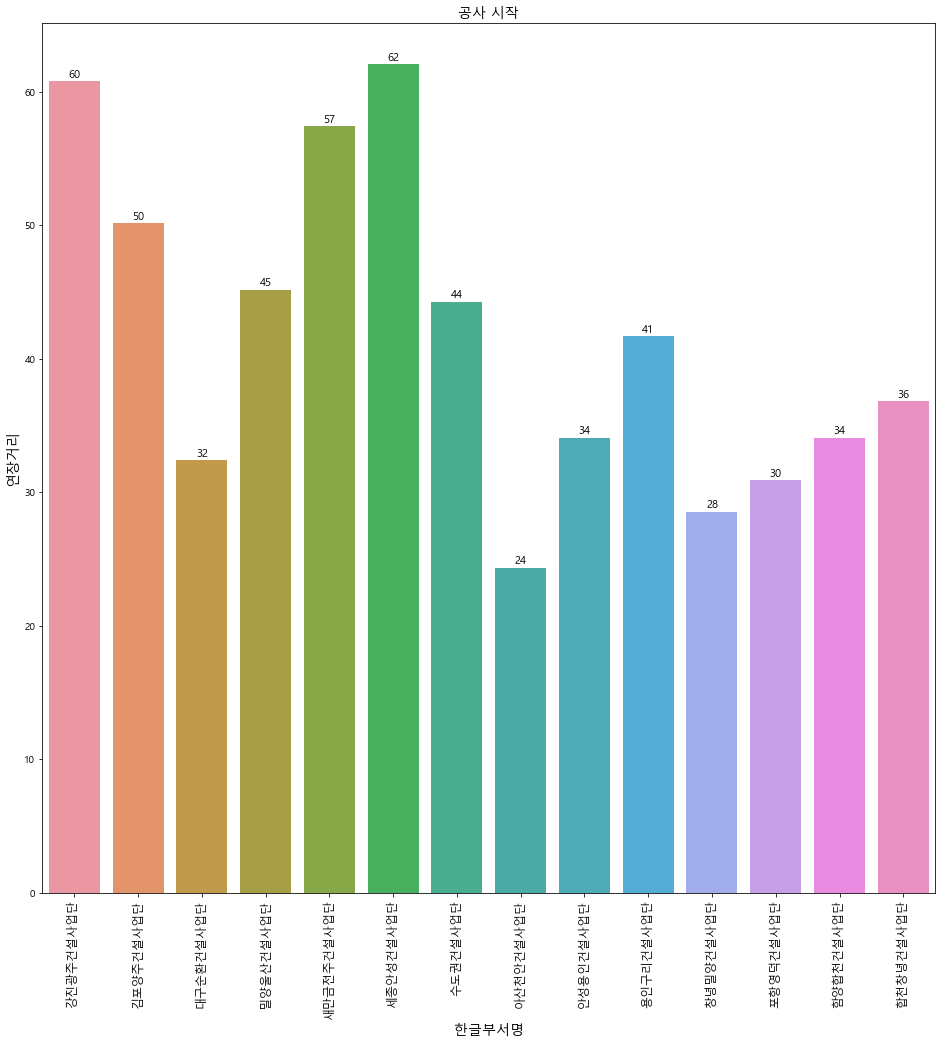

In [21]:
fig = plt.figure(figsize=(16, 8))
ax = sns.barplot(x='한글부서명',y='연장거리',data = bd_df_2)
for p in ax.patches:
    ax.annotate(format(int(p.get_height()), 'd'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 7), 
                   textcoords = 'offset points',
               fontsize=11)
ax.set_title('공사 시작', fontsize=14)
ax.set_ylabel('연장거리', fontsize=14)
ax.set_xlabel('한글부서명', fontsize=14)
# ax.set_title("임산물품목별 데이터 수", fontsize=20)
ax.xaxis.set_tick_params(labelsize=12)
ax.xaxis.set_tick_params(rotation=90)
fig.set_size_inches(16, 16)
# fig.savefig("Image/한글부서명_연장거리_시공.png",dpi=600)

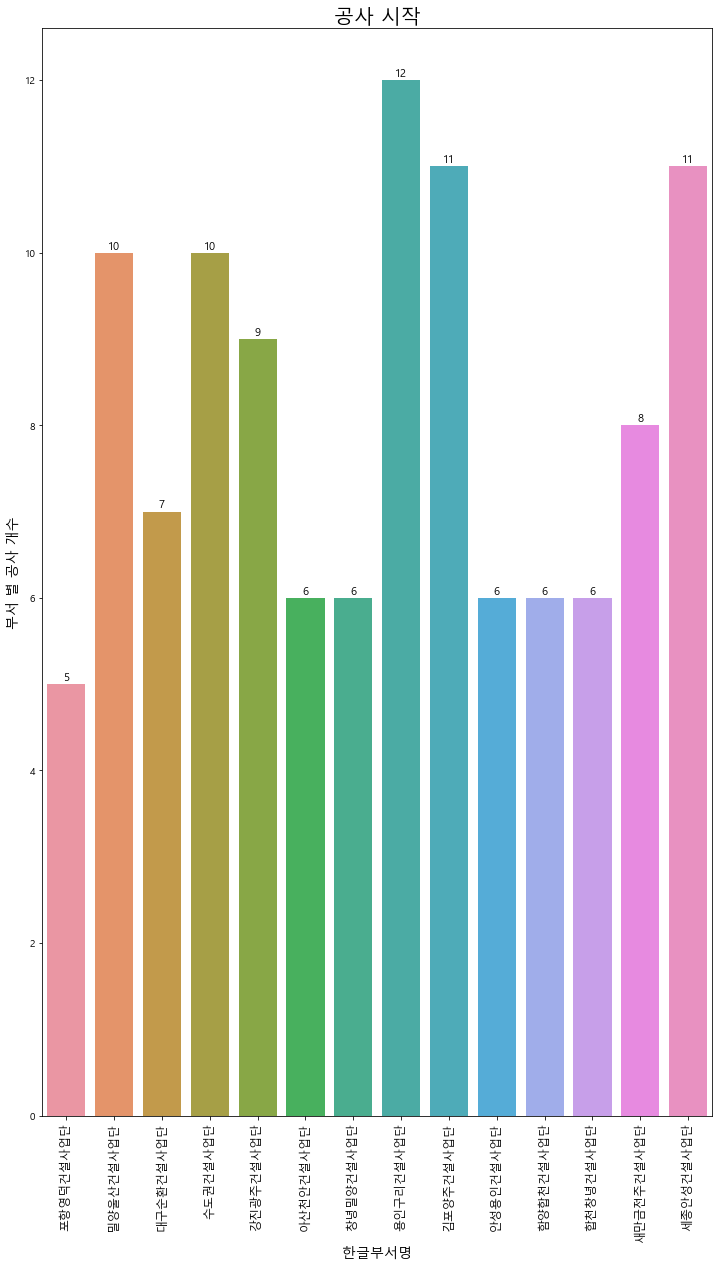

In [22]:
fig = plt.figure(figsize=(16, 8))
ax = sns.countplot(x='한글부서명',data = new_df2)
for p in ax.patches:
    ax.annotate(format(int(p.get_height()), 'd'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 7), 
                   textcoords = 'offset points',
               fontsize=11)
ax.set_ylabel('부서 별 공사 개수', fontsize=14)
ax.set_xlabel('한글부서명', fontsize=14)
ax.set_title("공사 시작", fontsize=20)
ax.xaxis.set_tick_params(labelsize=12)
ax.xaxis.set_tick_params(rotation=90)
fig.set_size_inches(12, 20)
# fig.savefig("Image/부서명_부서개서_시공.png",dpi=600)

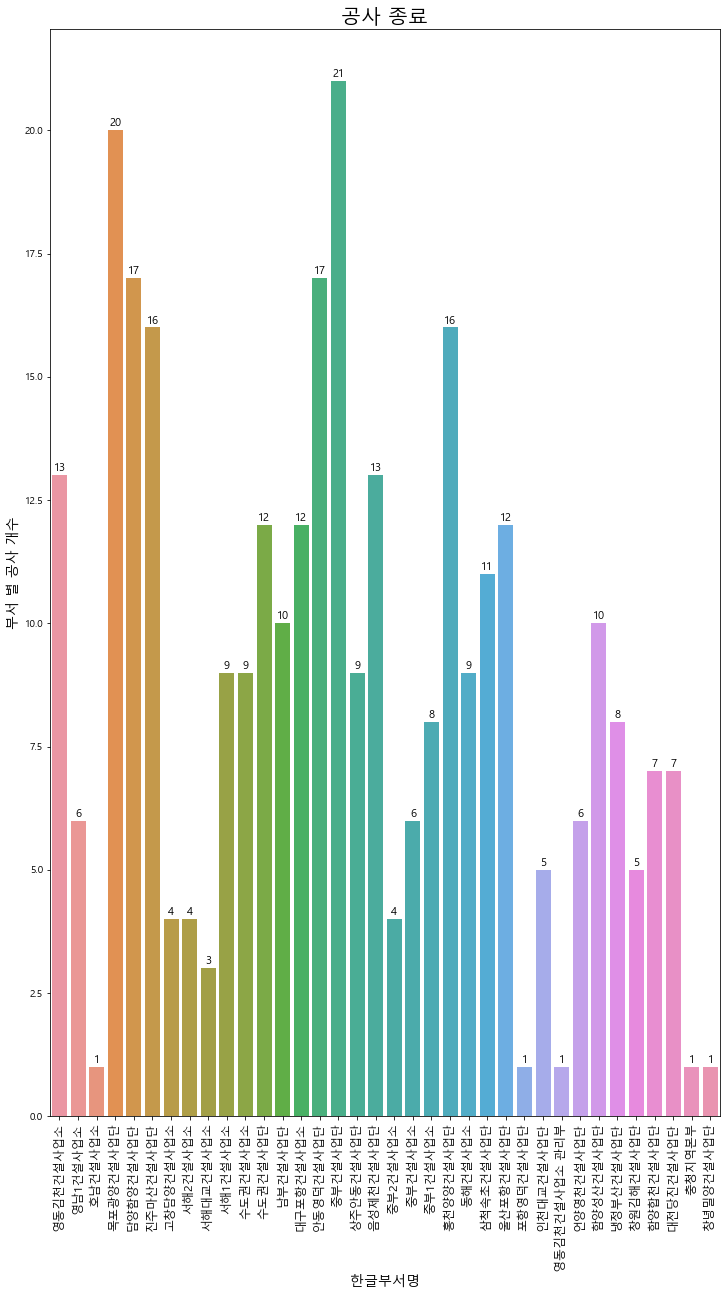

In [23]:
fig = plt.figure(figsize=(16, 8))
ax = sns.countplot(x='한글부서명',data = new_df3)
for p in ax.patches:
    ax.annotate(format(int(p.get_height()), 'd'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 7), 
                   textcoords = 'offset points',
               fontsize=11)
ax.set_ylabel('부서 별 공사 개수', fontsize=14)
ax.set_xlabel('한글부서명', fontsize=14)
ax.set_title("공사 종료", fontsize=20)
ax.xaxis.set_tick_params(labelsize=12)
ax.xaxis.set_tick_params(rotation=90)
fig.set_size_inches(12, 20)
# fig.savefig("Image/부서명_부서개서_준공.png",dpi=600)

In [24]:
gonggu_df_3 = pd.DataFrame(zip(new_df3.groupby('사업관리명').size().index,new_df3.groupby('사업관리명').size().values),columns=['사업관리명','사업관리개수'])
gonggu_df_2 = pd.DataFrame(zip(new_df2.groupby('사업관리명').size().index,new_df2.groupby('사업관리명').size().values),columns=['사업관리명','사업관리개수'])

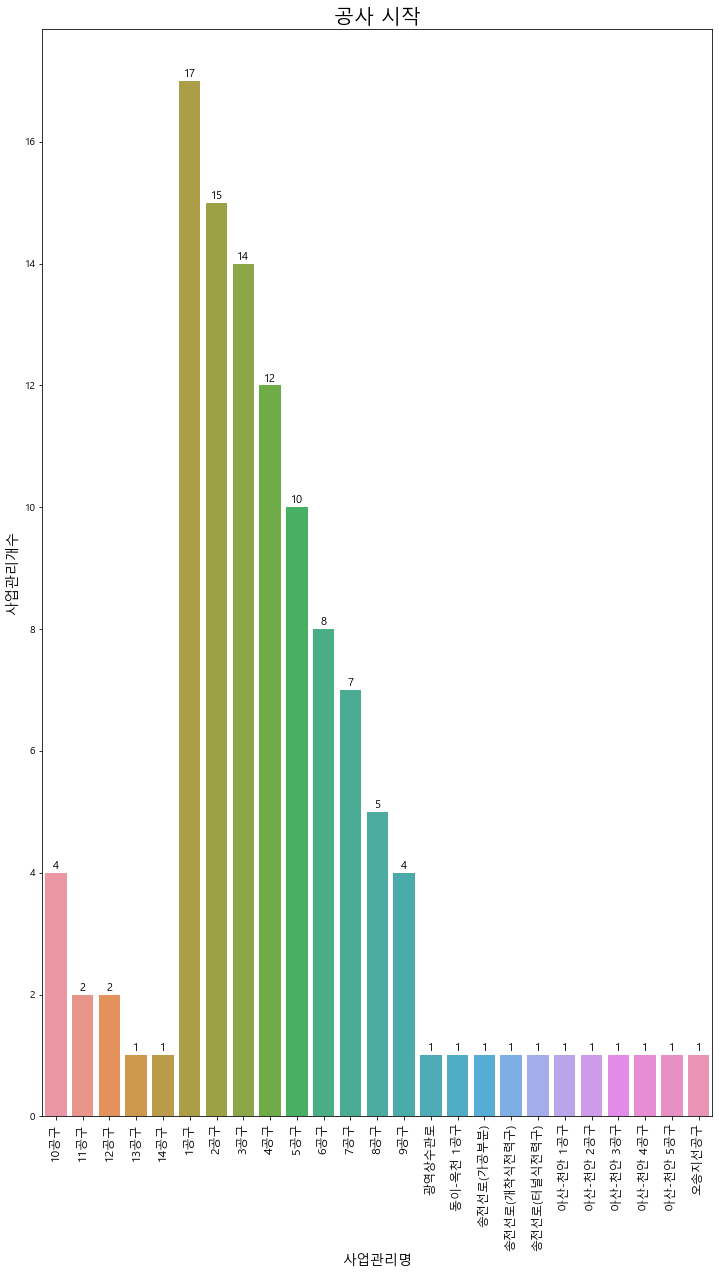

In [25]:
fig = plt.figure(figsize=(16, 8))
ax = sns.barplot(x='사업관리명',y='사업관리개수',data = gonggu_df_2)
for p in ax.patches:
    ax.annotate(format(int(p.get_height()), 'd'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 7), 
                   textcoords = 'offset points',
               fontsize=11)
ax.set_ylabel('사업관리개수', fontsize=14)
ax.set_xlabel('사업관리명', fontsize=14)
ax.set_title("공사 시작", fontsize=20)
ax.xaxis.set_tick_params(labelsize=12)
ax.xaxis.set_tick_params(rotation=90)
fig.set_size_inches(12, 20)
# fig.savefig("Image/사업관리명_사업관리개수_시공.png",dpi=600)

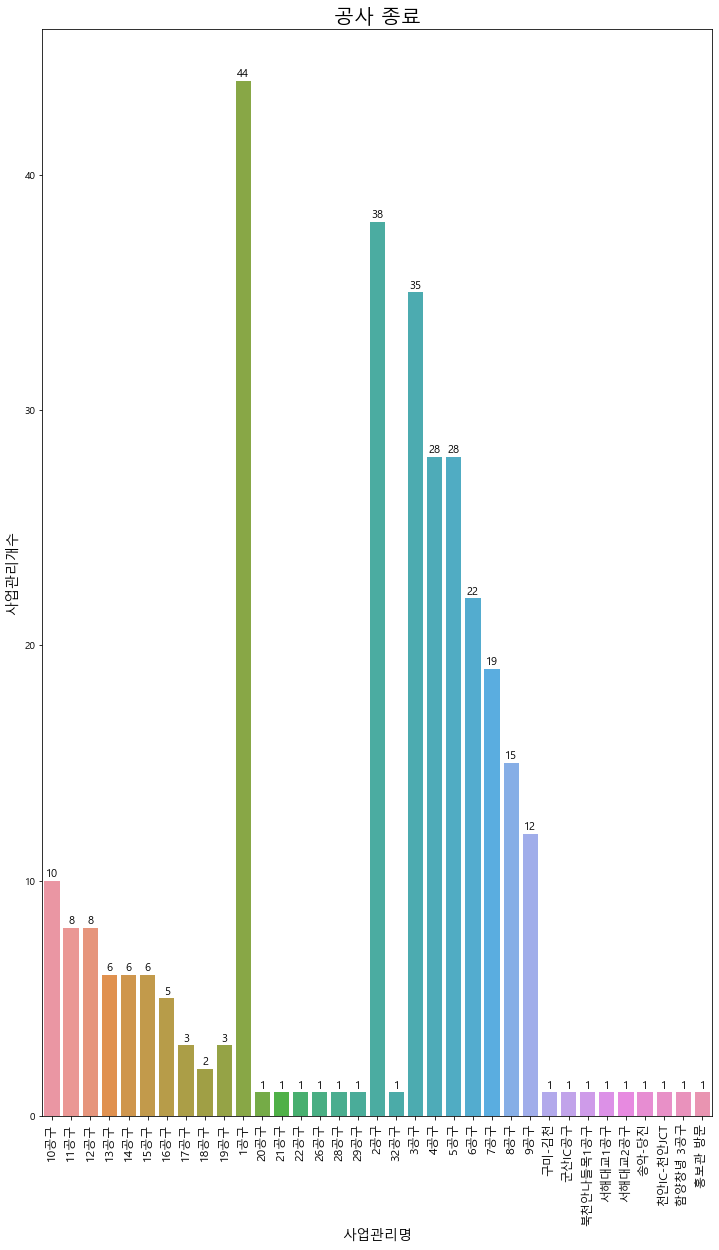

In [26]:
fig = plt.figure(figsize=(16, 8))
ax = sns.barplot(x='사업관리명',y='사업관리개수',data = gonggu_df_3)
for p in ax.patches:
    ax.annotate(format(int(p.get_height()), 'd'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 7), 
                   textcoords = 'offset points',
               fontsize=11)
ax.set_ylabel('사업관리개수', fontsize=14)
ax.set_xlabel('사업관리명', fontsize=14)
ax.set_title("공사 종료", fontsize=20)
ax.xaxis.set_tick_params(labelsize=12)
ax.xaxis.set_tick_params(rotation=90)
fig.set_size_inches(12, 20)
# fig.savefig("Image/사업관리명_사업관리개수_준공.png",dpi=600)

In [27]:
def change_time_all(x):
    try:
        time_change = datetime.strptime(str(x), "%Y%m%d").strftime("%Y-%m-%d")
        return time_change
    except: 
        pass

In [28]:
new_df['new_start'] = new_df['공사기간시작일자'].apply(lambda x: change_time_all(x))
new_df['new_end'] = new_df['공사기간종료일자'].apply(lambda x: change_time_all(x))

In [29]:
new_df.head()

,교통노선명,고속도로구간명,사업관리명,연장거리,공사기간시작일자,공사기간종료일자,공사구간시점명,공사구간종점명,사업진행상태코드,한글부서명,최종변경일시,new_start,new_end
0,경부선,언양-부산,3공구,10.00,20011207,20051205,경상남도 양산시 동면 내송리,부산광역시 금정구 구서동,C03,영동김천건설사업소,20201211083041,2001-12-07,2005-12-05
1,경부선,언양-부산,2공구,14.00,20011207,20051213,경상남도 양산시 상북면 상삼리,경상남도 양산시 신기동,C03,영동김천건설사업소,20201211083041,2001-12-07,2005-12-13
2,경부선,언양-부산,1공구,12.00,20011207,20051213,울산광역시 울주군 언양읍 동부리,경상남도 양산시 하북면,C03,영동김천건설사업소,20201211083041,2001-12-07,2005-12-13
3,경부선,동대구-경주,3공구,6.52,20011106,20061108,경상북도 영천시 금호읍 호남리,경상북도 영천시 본촌동,C03,영동김천건설사업소,20201211083041,2001-11-06,2006-11-08
4,경부선,동대구-경주,2공구,9.00,20011106,20061108,경상북도 경산시 진량읍 선화리,경상북도 영천시 금호읍 오계리,C03,영동김천건설사업소,20201211083041,2001-11-06,2006-11-08


In [30]:
end_df = new_df[new_df['new_end']<='2020-10-24']
ing_df = new_df[new_df['new_end']>='2020-10-24']

In [31]:
ing_df.groupby("교통노선명").size()

교통노선명
강진광주선        7
경부선          1
광주순환선        2
대구외곽순환선      7
동해선          5
세종포천선       26
수도권제2순환선    16
아산-천안선       5
오송지선         1
익산-포항선       8
함양울산선       27
dtype: int64

In [32]:
ing_df_new = pd.DataFrame(zip(new_df.groupby('교통노선명').size().index,new_df.groupby('교통노선명').size().values),columns=['교통노선명','교통노선개수'])

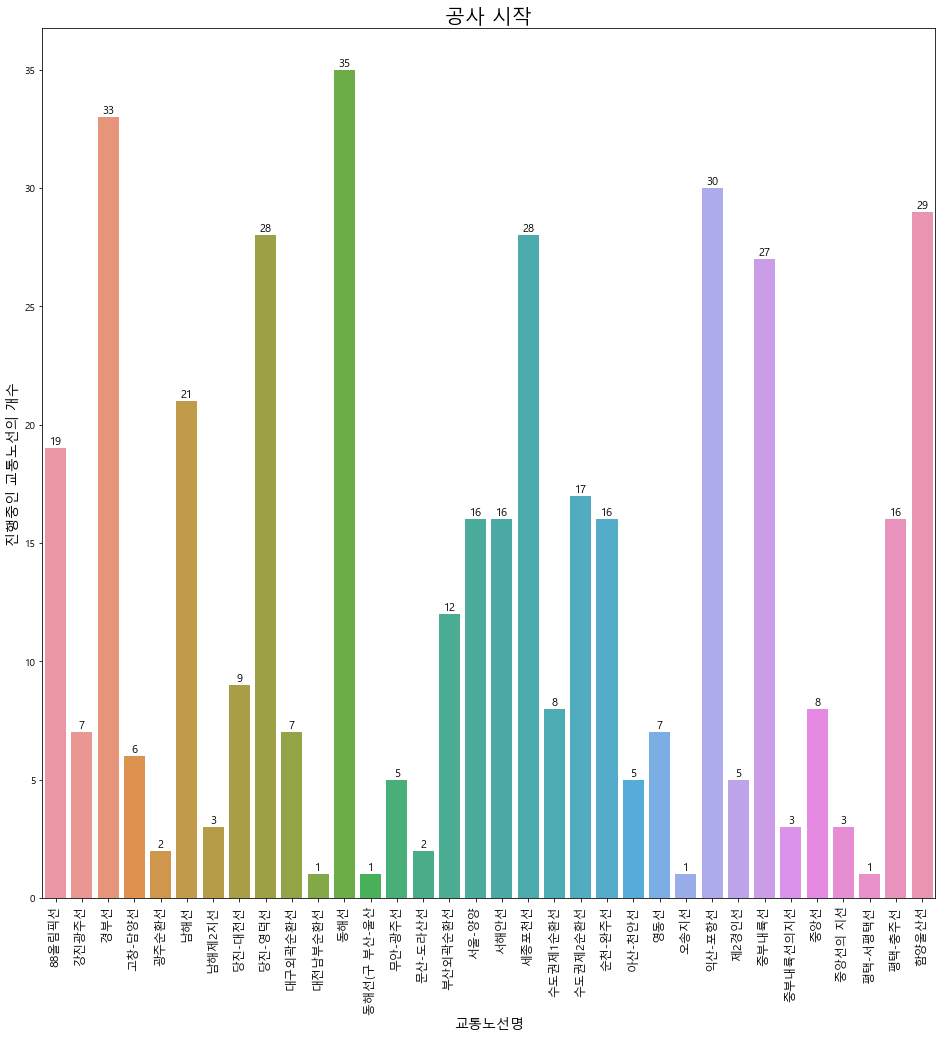

In [33]:
fig = plt.figure(figsize=(16, 8))
ax = sns.barplot(x='교통노선명',y='교통노선개수',data = ing_df_new)
for p in ax.patches:
    ax.annotate(format(int(p.get_height()), 'd'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 7), 
                   textcoords = 'offset points',
               fontsize=11)
ax.set_ylabel('진행중인 교통노선의 개수', fontsize=14)
ax.set_xlabel('교통노선명', fontsize=14)
ax.set_title("공사 시작", fontsize=20)
ax.xaxis.set_tick_params(labelsize=12)
ax.xaxis.set_tick_params(rotation=90)
fig.set_size_inches(16, 16)
# fig.savefig("Image/미래_교통노선명_교통노선개수.png",dpi=600)

In [34]:
word_df=new_df[['공사구간시점명','공사구간종점명']]
num_list_1,num_list_2 = [],[]
for i in range(len(word_df)):
    if len(word_df['공사구간시점명'].iloc[i])<=2:
        num_list_1.append(i)
    if len(word_df['공사구간종점명'].iloc[i])<=2:
        num_list_2.append(i)

In [35]:
word_df_1 = word_df.drop(word_df.index[num_list_1])
word_df_2 = word_df.drop(word_df.index[num_list_2])
word_df_1 = word_df_1.reset_index(drop=True)
word_df_2 = word_df_2.reset_index(drop=True)

In [36]:
data_list_1,data_list_2 = [],[]
for i in range(len(word_df)):
    data_list_1.append(word_df['공사구간시점명'].iloc[i].split())
    data_list_2.append(word_df['공사구간종점명'].iloc[i].split())
data_list_1 = [item for sublist in data_list_1 for item in sublist]
data_list_2 = [item for sublist in data_list_2 for item in sublist]

In [37]:
count_1 = Counter(data_list_1)
words_start = dict(count_1.most_common())
count_2 = Counter(data_list_2)
words_end = dict(count_2.most_common())

In [38]:
words_start

{'경기도': 62,
 '경상북도': 61,
 '경상남도': 42,
 '강원도': 40,
 '전라북도': 38,
 '충청북도': 36,
 '전라남도': 34,
 '충청남도': 20,
 '대구광역시': 17,
 '김해시': 14,
 '경남': 12,
 '충주시': 11,
 '울주군': 10,
 '홍천군': 10,
 '북구': 9,
 '완주군': 9,
 '상주시': 9,
 '경주시': 9,
 '용인시': 9,
 '밀양시': 9,
 '울산광역시': 8,
 '양양군': 8,
 '천안시': 7,
 '합천군': 7,
 '영천시': 6,
 '순천시': 6,
 '의성군': 6,
 '영덕군': 6,
 '안성시': 6,
 '인천광역시': 6,
 '동구': 5,
 '영동군': 5,
 '서울특별시': 5,
 '남원시': 5,
 '인제군': 5,
 '강릉시': 5,
 '경북': 5,
 '함양군': 5,
 '거창군': 5,
 '대동면': 5,
 '공주시': 5,
 '파주시': 5,
 '김천시': 4,
 '영암군': 4,
 '강진군': 4,
 '작천면': 4,
 '보성군': 4,
 '달성군': 4,
 '신촌리': 4,
 '진안군': 4,
 '임실군': 4,
 '서면': 4,
 '낙동면': 4,
 '안동시': 4,
 '음성군': 4,
 '여주군': 4,
 '동해시': 4,
 '양북면': 4,
 '연수구': 4,
 '진주시': 4,
 '부산': 4,
 '나주시': 4,
 '광주시': 4,
 '아산시': 4,
 '동남구': 4,
 '처인구': 4,
 '김제시': 4,
 '양산시': 3,
 '칠곡군': 3,
 '구미시': 3,
 '순창군': 3,
 '장성군': 3,
 '죽산리': 3,
 '성산면': 3,
 '화성군': 3,
 '매곡리': 3,
 '안산시': 3,
 '소양면': 3,
 '상관면': 3,
 '임고면': 3,
 '구례군': 3,
 '청원군': 3,
 '보은군': 3,
 '길안면': 3,
 '청송군': 3,
 '노은면': 3,
 '제천시': 3,
 '고령군': 3,
 '괴산군': 3,

In [39]:
words_end

{'경상북도': 66,
 '경기도': 60,
 '경상남도': 40,
 '강원도': 40,
 '전라북도': 35,
 '전라남도': 34,
 '충청북도': 32,
 '충청남도': 21,
 '대구광역시': 15,
 '충주시': 11,
 '완주군': 10,
 '홍천군': 10,
 '김해시': 10,
 '경남': 10,
 '상주시': 9,
 '경주시': 9,
 '밀양시': 9,
 '천안시': 8,
 '영덕군': 8,
 '양양군': 8,
 '울주군': 8,
 '영천시': 7,
 '북구': 7,
 '울산광역시': 7,
 '경북': 7,
 '용인시': 7,
 '합천군': 7,
 '순천시': 6,
 '서면': 6,
 '의성군': 6,
 '강릉시': 6,
 '인천광역시': 6,
 '부산광역시': 5,
 '동구': 5,
 '김천시': 5,
 '고령군': 5,
 '성산면': 5,
 '달성군': 5,
 '상관면': 5,
 '진안군': 5,
 '남원시': 5,
 '안성시': 5,
 '인제군': 5,
 '거창군': 5,
 '대동면': 5,
 '공주시': 5,
 '파주시': 5,
 '보성군': 4,
 '담양군': 4,
 '장성군': 4,
 '죽산리': 4,
 '당진군': 4,
 '서울특별시': 4,
 '임실군': 4,
 '안동시': 4,
 '음성군': 4,
 '양평군': 4,
 '동해시': 4,
 '양북면': 4,
 '진주시': 4,
 '함양군': 4,
 '부산': 4,
 '나주시': 4,
 '광주광역시': 4,
 '광주시': 4,
 '동남구': 4,
 '처인구': 4,
 '양산시': 3,
 '칠곡군': 3,
 '영동군': 3,
 '옥천군': 3,
 '영암군': 3,
 '강진군': 3,
 '작천면': 3,
 '화성군': 3,
 '신촌리': 3,
 '장수군': 3,
 '임고면': 3,
 '종로구': 3,
 '구례군': 3,
 '보은군': 3,
 '낙동면': 3,
 '길안면': 3,
 '청송군': 3,
 '노은면': 3,
 '제천시': 3,
 '괴산군': 3,
 '여주군': 3,
 '산북면'

<class 'numpy.ndarray'>
(800, 800, 3)


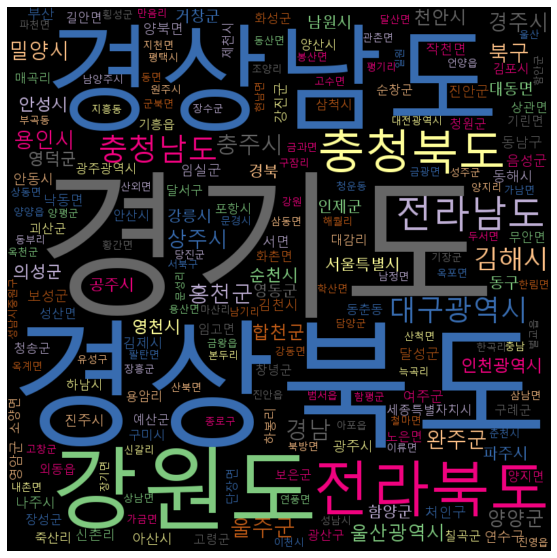

In [42]:
wordcloud_words = wordcloud.generate_from_frequencies(words_start)
array = wordcloud.to_array()
print(type(array)) # numpy.ndarray
print(array.shape) # (800, 800, 3)

fig = plt.figure(figsize=(10, 10))
plt.imshow(array, interpolation="bilinear")
plt.axis('off')
plt.show()
fig.savefig('Image/wordcloud_start.png')

<class 'numpy.ndarray'>
(800, 800, 3)


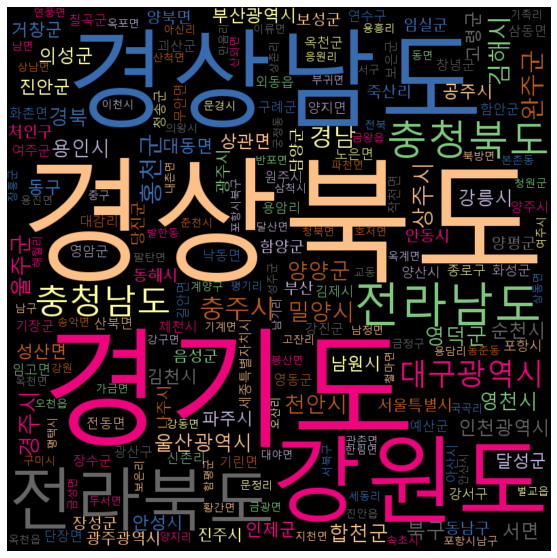

In [43]:
wordcloud_words = wordcloud.generate_from_frequencies(words_end)
array = wordcloud.to_array()
print(type(array)) # numpy.ndarray
print(array.shape) # (800, 800, 3)

fig = plt.figure(figsize=(10, 10))
plt.imshow(array, interpolation="bilinear")
plt.axis('off')
plt.show()
fig.savefig('Image/wordcloud_end.png')

In [44]:
new_df.head()

,교통노선명,고속도로구간명,사업관리명,연장거리,공사기간시작일자,공사기간종료일자,공사구간시점명,공사구간종점명,사업진행상태코드,한글부서명,최종변경일시,new_start,new_end
0,경부선,언양-부산,3공구,10.00,20011207,20051205,경상남도 양산시 동면 내송리,부산광역시 금정구 구서동,C03,영동김천건설사업소,20201211083041,2001-12-07,2005-12-05
1,경부선,언양-부산,2공구,14.00,20011207,20051213,경상남도 양산시 상북면 상삼리,경상남도 양산시 신기동,C03,영동김천건설사업소,20201211083041,2001-12-07,2005-12-13
2,경부선,언양-부산,1공구,12.00,20011207,20051213,울산광역시 울주군 언양읍 동부리,경상남도 양산시 하북면,C03,영동김천건설사업소,20201211083041,2001-12-07,2005-12-13
3,경부선,동대구-경주,3공구,6.52,20011106,20061108,경상북도 영천시 금호읍 호남리,경상북도 영천시 본촌동,C03,영동김천건설사업소,20201211083041,2001-11-06,2006-11-08
4,경부선,동대구-경주,2공구,9.00,20011106,20061108,경상북도 경산시 진량읍 선화리,경상북도 영천시 금호읍 오계리,C03,영동김천건설사업소,20201211083041,2001-11-06,2006-11-08


In [45]:
def change_time_year(x):
    try:
        time_change = datetime.strptime(str(x), "%Y%m%d").strftime("%Y-%m-%d")
        return time_change[:4]
    except: 
        pass

In [46]:
new_df3['공사시작시간'] = new_df3['공사기간시작일자'].apply(lambda x: change_time_year(x))
new_df3['공사종료시간'] = new_df3['공사기간종료일자'].apply(lambda x: change_time_year(x))

C:\Users\pcn\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\pcn\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [47]:
time_new_df3 = new_df3[['공사시작시간','교통노선명','공사종료시간']]

In [48]:
num_list = []
for i in range(len(time_new_df3)):
    if type(time_new_df3['공사시작시간'].iloc[i])!=str or type(time_new_df3['공사종료시간'].iloc[i])!=str:
        num_list.append(i)
time_new_df3 = time_new_df3.drop(time_new_df3.index[num_list])
time_new_df3 = time_new_df3.sort_values(by='공사시작시간')
# time_new_df3 = time_new_df3.sort_values(by='공사종료시간',ascending=True)
# time_new_df3 = time_new_df3.sort_values(by='공사시작시간')

In [49]:
print(time_new_df3['교통노선명'].unique())
len(time_new_df3['교통노선명'].unique())

['영동선' '서해안선' '수도권제1순환선' '대전남부순환선' '중부내륙선' '중앙선' '경부선' '동해선' '중부내륙선의지선'
 '당진-영덕선' '당진-대전선' '고창-담양선' '88올림픽선' '익산-포항선' '남해선' '무안-광주선' '평택-충주선'
 '서울-양양' '순천-완주선' '제2경인선' '남해제2지선' '중앙선의 지선' '부산외곽순환선' '평택-서평택선' '함양울산선']


25

In [50]:
lables = time_new_df3['교통노선명'].unique()
color = ['red','blue','gray','darkcyan','lavender','lightcyan','indigo','brown','pink','dodgerblue','olive','coral','azure' \
        'tomato','sienna','chartreuse','honeydew','aliceblue','plumk','spriggreen','slateblue','crimson','steelblue','darkgreen','slategrey'
        ]

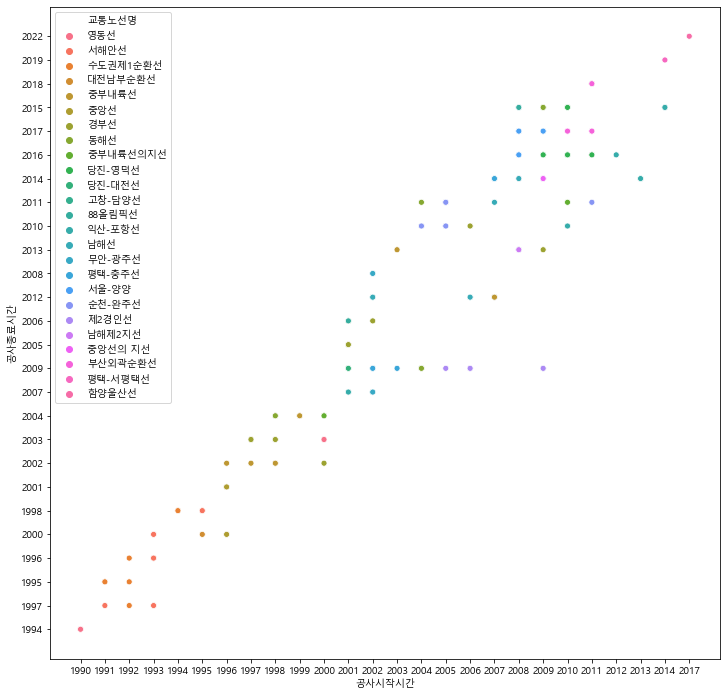

In [51]:
plt.figure(figsize=(12,12))
g =sns.scatterplot(x="공사시작시간", y="공사종료시간",
              hue="교통노선명",
              data=time_new_df3);
# plt.savefig("Image/공사_시작_종료_노선.png",dpi=600)